# A* Algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

n = 5
matrix = []
block_unblock_matrix = []


In [2]:
def euclidean_distance_calc(i, j, n):
    return math.sqrt(((n - i)**2 + (n - j)**2))

def chebyshev_distance_calc(i, j, n):
    return max((n - i), (n - j))


def manhattan_distance_calc(i, j, n):
    return abs(n - i) + abs(n - j)

def compute_hofn(n, heuristic):
    
    hofn_matrix = []
    for i in range(n):
        hofn_row = []
        for j in range(n):
            if heuristic == "euclidean":
                dist = euclidean_distance_calc(i, j, n -1)
            elif heuristic == "chebyshev":
                dist = chebyshev_distance_calc(i, j, n -1)
            elif heuristic == "manhattan":
                dist = manhattan_distance_calc(i, j, n -1)
            hofn_row.append(dist)
        hofn_matrix.append(hofn_row)
    return np.array(hofn_matrix)

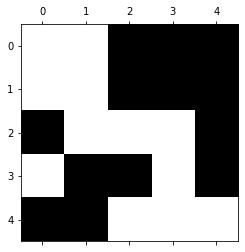

In [3]:
def populateMatrix(n,p):
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array

np_array = populateMatrix(n,0.5)
block_unblock_matrix = np.asmatrix(np_array)

# block_unblock_matrix = [[0, 0, 1, 0, 0],
#         [0, 1, 0, 1, 0],
#         [0, 0, 0, 0, 0],
#         [0, 1, 1, 0, 0],
#         [1, 0, 1, 1, 0]]
# block_unblock_matrix = np.matrix(block_unblock_matrix)
plt.spy(block_unblock_matrix)


In [4]:
block_unblock_matrix

matrix([[0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 0, 1],
        [1, 1, 0, 0, 0]])

g(n) matrix

In [5]:
def compute_gofn(n):
    k = 0
    gofn = []
    one_row = []
    for j in range(n):
        one_row.append(k)
        k += 1
    gofn.append(one_row)
    for i in range(n-1):
        one_row = [x+1 for x in one_row]
        gofn.append(one_row)

    gofn_matrix = np.array([np.array(xi) for xi in gofn])
    return gofn_matrix

In [6]:
def get_gofn(gofn_matrix, row, col):
    return gofn_matrix[row][col]

In [7]:
def get_hofn(hofn_matrix, row, col):
    return hofn_matrix[row][col]

In [8]:
def get_children(matrix, x, y, n, gofn, visited_list):
    allChildren = [(x+1,y,gofn+1),#down
                   (x-1,y,gofn+1),#up
                   (x,y+1,gofn+1),#right
                   (x,y-1,gofn+1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y,gofn+1))
    if x-1 < 0:
        allChildren.remove((x-1,y,gofn+1))
    if y+1 > n-1:
        allChildren.remove((x,y+1,gofn+1))
    if y-1 < 0:
        allChildren.remove((x,y-1,gofn+1))
    print("allChildren", allChildren)
    for node in allChildren:
        if node[:2] in visited_list:
            allChildren.remove(node)
            print("removed: ", node, "from children")

    
    return allChildren

In [9]:
def sort(open_list, gofn_matrix, hofn_matrix):
    sort_dict = {}
    for node in open_list:
        row = node[0]
        col = node[1]
        gofn = gofn_matrix.item(row,col)
        hofn = hofn_matrix.item(row,col)
        print("node", node, " - gofn: ", gofn,  " - hofn: ", hofn)
        sort_dict[node] = hofn
        
        sort_dict = dict(sorted(sort_dict.items(), key=lambda item: item[1]))
    return sort_dict

In [10]:
def display(trajectory_path):
    np_array = populateMatrix(n,0)
    final_display_matrix = np.asmatrix(np_array)
    for path in trajectory_path:
        final_display_matrix[path[:2]] = 1
    colormap = colors.ListedColormap(["white","green"])
    plt.imshow(final_display_matrix, cmap=colormap)
    plt.show()

In [11]:
def node_block_check(children_dict, block_unblock_matrix):
    node_blocked = 0
    node_removal_list = []
    for node in children_dict:
        children_node_list = children_dict[node]
        for i in range(len(children_node_list)):
            #checking if all children are blocked
            if block_unblock_matrix.item(children_node_list[i]) == 1:
                node_blocked += 1
            if node_blocked == len(children_node_list):
                node_removal_list.append(node)
    return node_removal_list

In [12]:
def astar(block_unblock_matrix):
    visited_list = []
    open_list = []
    trajectory_path = []
    path_block = 0
    children_dict = {}
    i = 0
    start = (0, 0, 0)
    goal = (n-1, n-1)

    open_list.append(start)
    gofn_matrix = compute_gofn(n)
    hofn_matrix = compute_hofn(n, "manhattan")

    while open_list:
        child_list = []
        current_node = open_list.pop(0)
        if current_node[:2] not in visited_list:
            visited_list.append(current_node[:2])
            if current_node[:2] not in trajectory_path: 
                trajectory_path.append(current_node[:2])
            print("current_node:", current_node)

            if block_unblock_matrix.item(current_node[0], current_node[1]) == 0:
                if current_node[0] == n-1 and current_node[1] == n-1:
                    print("Reached Goal!!!!!!!!!!!!!!!!!!!!!!!")
                    trajectory_path.append(current_node[:2])
                    display(trajectory_path)
#                     astar(1 - final_display_matrix)
                    break
                print("visited_list", visited_list)

                children = get_children(block_unblock_matrix, current_node[0], current_node[1], n, current_node[2], visited_list)
                print("children", children)

                for x in children:
                    child_list.append(x[:2])
                children_dict[current_node[:2]] = child_list
                
                print("child_list", child_list)
                
                for node in children:
                    if node not in open_list:
                        open_list.append(node)
                sort_dict = sort(open_list, gofn_matrix, hofn_matrix)

                print("sort_dict", sort_dict)
                open_list = list(sort_dict.keys())
                print("updated open list: ", open_list)
                print("trajectory_path: ", trajectory_path)
                print("---------------------\n")

                node_removal_list = node_block_check(children_dict, block_unblock_matrix)
                for node in node_removal_list:
                    if node in trajectory_path:
                        trajectory_path.remove(node)
                print("node_removal_list", node_removal_list)

                display(trajectory_path)
            else:
                if open_list == []:
                    print("There is no path available to goal Node")
                    break
                else:
                    print("path blocked from", current_node, "backtracking and attempting to Traversing from a different node")
                    if current_node[:2] in trajectory_path:
                        trajectory_path.remove(current_node[:2])
        else:
            print(current_node[:2], "node already visited")

current_node: (0, 0, 0)
visited_list [(0, 0)]
allChildren [(1, 0, 1), (0, 1, 1)]
children [(1, 0, 1), (0, 1, 1)]
child_list [(1, 0), (0, 1)]
node (1, 0, 1)  - gofn:  1  - hofn:  7
node (0, 1, 1)  - gofn:  1  - hofn:  7
sort_dict {(1, 0, 1): 7, (0, 1, 1): 7}
updated open list:  [(1, 0, 1), (0, 1, 1)]
trajectory_path:  [(0, 0)]
---------------------

node_removal_list []


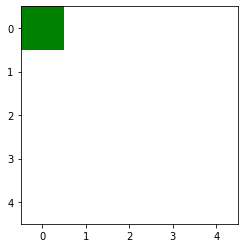

current_node: (1, 0, 1)
visited_list [(0, 0), (1, 0)]
allChildren [(2, 0, 2), (0, 0, 2), (1, 1, 2)]
removed:  (0, 0, 2) from children
children [(2, 0, 2), (1, 1, 2)]
child_list [(2, 0), (1, 1)]
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (2, 0, 2)  - gofn:  2  - hofn:  6
node (1, 1, 2)  - gofn:  2  - hofn:  6
sort_dict {(2, 0, 2): 6, (1, 1, 2): 6, (0, 1, 1): 7}
updated open list:  [(2, 0, 2), (1, 1, 2), (0, 1, 1)]
trajectory_path:  [(0, 0), (1, 0)]
---------------------

node_removal_list []


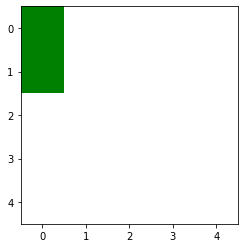

current_node: (2, 0, 2)
path blocked from (2, 0, 2) backtracking and attempting to Traversing from a different node
current_node: (1, 1, 2)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1)]
allChildren [(2, 1, 3), (0, 1, 3), (1, 2, 3), (1, 0, 3)]
removed:  (1, 0, 3) from children
children [(2, 1, 3), (0, 1, 3), (1, 2, 3)]
child_list [(2, 1), (0, 1), (1, 2)]
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (2, 1, 3)  - gofn:  3  - hofn:  5
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (1, 2, 3)  - gofn:  3  - hofn:  5
sort_dict {(2, 1, 3): 5, (1, 2, 3): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(2, 1, 3), (1, 2, 3), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1)]
---------------------

node_removal_list []


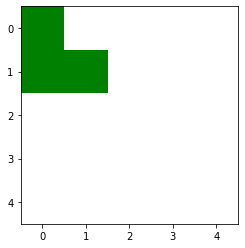

current_node: (2, 1, 3)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1), (2, 1)]
allChildren [(3, 1, 4), (1, 1, 4), (2, 2, 4), (2, 0, 4)]
removed:  (1, 1, 4) from children
removed:  (2, 0, 4) from children
children [(3, 1, 4), (2, 2, 4)]
child_list [(3, 1), (2, 2)]
node (1, 2, 3)  - gofn:  3  - hofn:  5
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (3, 1, 4)  - gofn:  4  - hofn:  4
node (2, 2, 4)  - gofn:  4  - hofn:  4
sort_dict {(3, 1, 4): 4, (2, 2, 4): 4, (1, 2, 3): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(3, 1, 4), (2, 2, 4), (1, 2, 3), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1), (2, 1)]
---------------------

node_removal_list []


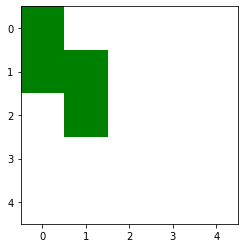

current_node: (3, 1, 4)
path blocked from (3, 1, 4) backtracking and attempting to Traversing from a different node
current_node: (2, 2, 4)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1), (2, 1), (3, 1), (2, 2)]
allChildren [(3, 2, 5), (1, 2, 5), (2, 3, 5), (2, 1, 5)]
removed:  (2, 1, 5) from children
children [(3, 2, 5), (1, 2, 5), (2, 3, 5)]
child_list [(3, 2), (1, 2), (2, 3)]
node (1, 2, 3)  - gofn:  3  - hofn:  5
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (3, 2, 5)  - gofn:  5  - hofn:  3
node (1, 2, 5)  - gofn:  3  - hofn:  5
node (2, 3, 5)  - gofn:  5  - hofn:  3
sort_dict {(3, 2, 5): 3, (2, 3, 5): 3, (1, 2, 3): 5, (1, 2, 5): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(3, 2, 5), (2, 3, 5), (1, 2, 3), (1, 2, 5), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2)]
---------------------

node_removal_list []


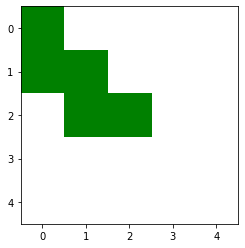

current_node: (3, 2, 5)
path blocked from (3, 2, 5) backtracking and attempting to Traversing from a different node
current_node: (2, 3, 5)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1), (2, 1), (3, 1), (2, 2), (3, 2), (2, 3)]
allChildren [(3, 3, 6), (1, 3, 6), (2, 4, 6), (2, 2, 6)]
removed:  (2, 2, 6) from children
children [(3, 3, 6), (1, 3, 6), (2, 4, 6)]
child_list [(3, 3), (1, 3), (2, 4)]
node (1, 2, 3)  - gofn:  3  - hofn:  5
node (1, 2, 5)  - gofn:  3  - hofn:  5
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (3, 3, 6)  - gofn:  6  - hofn:  2
node (1, 3, 6)  - gofn:  4  - hofn:  4
node (2, 4, 6)  - gofn:  6  - hofn:  2
sort_dict {(3, 3, 6): 2, (2, 4, 6): 2, (1, 3, 6): 4, (1, 2, 3): 5, (1, 2, 5): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(3, 3, 6), (2, 4, 6), (1, 3, 6), (1, 2, 3), (1, 2, 5), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)]
---------------------

node_removal_list []


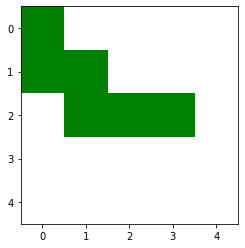

current_node: (3, 3, 6)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1), (2, 1), (3, 1), (2, 2), (3, 2), (2, 3), (3, 3)]
allChildren [(4, 3, 7), (2, 3, 7), (3, 4, 7), (3, 2, 7)]
removed:  (2, 3, 7) from children
removed:  (3, 2, 7) from children
children [(4, 3, 7), (3, 4, 7)]
child_list [(4, 3), (3, 4)]
node (2, 4, 6)  - gofn:  6  - hofn:  2
node (1, 3, 6)  - gofn:  4  - hofn:  4
node (1, 2, 3)  - gofn:  3  - hofn:  5
node (1, 2, 5)  - gofn:  3  - hofn:  5
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (4, 3, 7)  - gofn:  7  - hofn:  1
node (3, 4, 7)  - gofn:  7  - hofn:  1
sort_dict {(4, 3, 7): 1, (3, 4, 7): 1, (2, 4, 6): 2, (1, 3, 6): 4, (1, 2, 3): 5, (1, 2, 5): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(4, 3, 7), (3, 4, 7), (2, 4, 6), (1, 3, 6), (1, 2, 3), (1, 2, 5), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]
---------------------

node_removal_list []


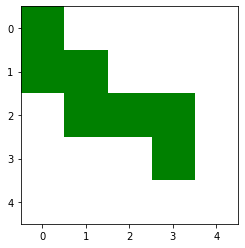

current_node: (4, 3, 7)
visited_list [(0, 0), (1, 0), (2, 0), (1, 1), (2, 1), (3, 1), (2, 2), (3, 2), (2, 3), (3, 3), (4, 3)]
allChildren [(3, 3, 8), (4, 4, 8), (4, 2, 8)]
removed:  (3, 3, 8) from children
children [(4, 4, 8), (4, 2, 8)]
child_list [(4, 4), (4, 2)]
node (3, 4, 7)  - gofn:  7  - hofn:  1
node (2, 4, 6)  - gofn:  6  - hofn:  2
node (1, 3, 6)  - gofn:  4  - hofn:  4
node (1, 2, 3)  - gofn:  3  - hofn:  5
node (1, 2, 5)  - gofn:  3  - hofn:  5
node (0, 1, 1)  - gofn:  1  - hofn:  7
node (0, 1, 3)  - gofn:  1  - hofn:  7
node (4, 4, 8)  - gofn:  8  - hofn:  0
node (4, 2, 8)  - gofn:  6  - hofn:  2
sort_dict {(4, 4, 8): 0, (3, 4, 7): 1, (2, 4, 6): 2, (4, 2, 8): 2, (1, 3, 6): 4, (1, 2, 3): 5, (1, 2, 5): 5, (0, 1, 1): 7, (0, 1, 3): 7}
updated open list:  [(4, 4, 8), (3, 4, 7), (2, 4, 6), (4, 2, 8), (1, 3, 6), (1, 2, 3), (1, 2, 5), (0, 1, 1), (0, 1, 3)]
trajectory_path:  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3)]
---------------------

node_removal_list []

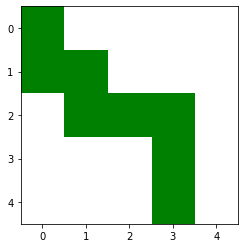

current_node: (4, 4, 8)
Reached Goal!!!!!!!!!!!!!!!!!!!!!!!


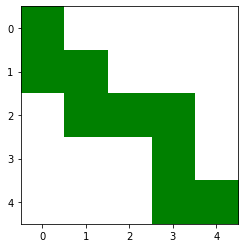

In [13]:
astar(block_unblock_matrix)

In [14]:
# block_unblock_matrix[block_unblock_matrix==0] = 1

In [15]:
block_unblock_matrix = 1 - block_unblock_matrix
block_unblock_matrix

matrix([[1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 1, 1, 1]])